### 导入工具包

In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import random
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,ComplementNB,BernoulliNB#多项式、补集和伯努利的贝叶斯
from time import time
import warnings
warnings.filterwarnings("ignore")

### 导入下载的20_newsgroups，但由于是文本，需要把它处理成.csv

In [2]:
path = '20_newsgroups/'
file_names = os.listdir(path)

In [3]:
len(file_names)

20

In [4]:
file_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
target=[]
data=[]
for file_name in file_names:
    path_ = '20_newsgroups/{}'.format(file_name)
    file_names_ = os.listdir(path_)
    for file in file_names_:
        if file !='.ipynb_checkpoints':
            path__='20_newsgroups/{}/{}'.format(file_name,file)
            text = open(path__, encoding="utf8", errors='ignore')
            text=text.read()
#             print(text)
            data.append(text)
            target.append(file_name)

In [6]:
df = pd.DataFrame({'data': data,'target': target}, columns=['data', 'target'])
df.to_csv('./20_newsgroups.csv')

## 探索文本数据

In [7]:
df=pd.read_csv('20_newsgroups.csv')

In [8]:
df

,Unnamed: 0,data,target
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [9]:
df['data'][0]

'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resources\nLast-m

In [10]:
np.unique(df.target)

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [11]:
for i in ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc']:
    print(i,(df.target==i).sum()/len(df.target))

alt.atheism 0.050007501125168774
comp.graphics 0.050007501125168774
comp.os.ms-windows.misc 0.050007501125168774
comp.sys.ibm.pc.hardware 0.050007501125168774
comp.sys.mac.hardware 0.050007501125168774
comp.windows.x 0.050007501125168774
misc.forsale 0.050007501125168774
rec.autos 0.050007501125168774
rec.motorcycles 0.050007501125168774
rec.sport.baseball 0.050007501125168774
rec.sport.hockey 0.050007501125168774
sci.crypt 0.050007501125168774
sci.electronics 0.050007501125168774
sci.med 0.050007501125168774
sci.space 0.050007501125168774
soc.religion.christian 0.049857478621793266
talk.politics.guns 0.050007501125168774
talk.politics.mideast 0.050007501125168774
talk.politics.misc 0.050007501125168774
talk.religion.misc 0.050007501125168774


#### 看样本均不均衡，看每个类占总共类别的百分之多少，可以看到总体是比较均衡的。

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df.data,df.target,test_size=0.25,random_state=3)

## 文本特征提取

#### 使用TF-IDF向量计数

In [13]:
tfidf=TFIDF().fit(x_train)
Xtrain_=tfidf.transform(x_train)
Xtest_=tfidf.transform(x_test)

### 使用三种不同分布的朴素贝叶斯模型先进行预测，分别是Multinomial，Complement，Bernuolli

高斯朴素贝叶斯是不接受稀疏矩阵的，而这里恰恰就是稀疏矩阵，所以就不能用这个

In [14]:
name=['Multinomial','Complement','Bernuolli']
models=[MultinomialNB(),ComplementNB(),BernoulliNB()]
for name,mod in zip(name,models):#zip整合函数
    times=time()
    mod.fit(Xtrain_,y_train)
    y_pred=mod.predict(Xtest_)
    score=mod.score(Xtest_,y_test)
    
    print(name)
    print("\tAccuracy:{:.3f}".format(score))
    print(classification_report(y_test, y_pred, target_names=np.unique(df.target)))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

Multinomial
	Accuracy:0.877
                          precision    recall  f1-score   support

             alt.atheism       0.83      0.82      0.82       255
           comp.graphics       0.95      0.73      0.82       265
 comp.os.ms-windows.misc       0.93      0.89      0.91       270
comp.sys.ibm.pc.hardware       0.82      0.86      0.84       259
   comp.sys.mac.hardware       0.81      0.94      0.87       234
          comp.windows.x       0.93      0.86      0.89       261
            misc.forsale       0.97      0.81      0.88       250
               rec.autos       0.89      0.93      0.91       221
         rec.motorcycles       0.95      0.94      0.95       225
      rec.sport.baseball       0.97      0.94      0.95       262
        rec.sport.hockey       0.95      0.95      0.95       261
               sci.crypt       0.84      0.97      0.90       230
         sci.electronics       0.94      0.82      0.88       267
                 sci.med       0.98      0.90  

在还没有选择超参数的值的情况下，Complement不仅Accuracy最高而且用时最短，表现最好

### 分别在这三种模型下通过交叉验证，选择最优超参数

In [15]:
# 交叉验证
cv1= []
cv2= []
cv3= []
mean1=[] 
mean2=[]
mean3=[]
search_list = [0.00001,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.2,0.5,0.7,0.9,1] 
for i in search_list:
    accuracy1 = []
    accuracy2 = []
    accuracy3 = []
    print("alpha:",i)
    for j in range(5):
        print("-------------fold{:.1f}------------".format(j))
        x_train, x_test, y_train, y_test = train_test_split(df.data,df.target,test_size=0.2,random_state=random.randrange(0,1000))
        
        tfidf=TFIDF().fit(x_train)
        Xtrain_=tfidf.transform(x_train)
        Xtest_=tfidf.transform(x_test)

        model1 = MultinomialNB(alpha=i)
        model1.fit(Xtrain_, y_train)
        val_accuracy1= model1.score(Xtest_, y_test)
        
        model2 = ComplementNB(alpha=i)
        model2.fit(Xtrain_, y_train)
        val_accuracy2= model2.score(Xtest_, y_test)
        
        model3 = BernoulliNB(alpha=i)
        model3.fit(Xtrain_, y_train)
        val_accuracy3= model3.score(Xtest_, y_test)
        
        print(j+1,"val_accuracy1:", val_accuracy1)
        print(j+1,"val_accuracy2:", val_accuracy2)
        print(j+1,"val_accuracy3:", val_accuracy3)
        accuracy1.append(val_accuracy1)
        accuracy2.append(val_accuracy2)
        accuracy3.append(val_accuracy3)
    acc_sum=0
    for t in range(len(accuracy1)):
        acc_sum=acc_sum+accuracy1[t]
    print("alpha:",i,"accuracy1:",acc_sum/5)
    acc_sum=0
    for t in range(len(accuracy2)):
        acc_sum=acc_sum+accuracy2[t]
    print("alpha:",i,"accuracy2:",acc_sum/5)
    acc_sum=0
    for t in range(len(accuracy3)):
        acc_sum=acc_sum+accuracy3[t]
    print("alpha:",i,"accuracy3:",acc_sum/5)
    print("\n")
    cv1.append(accuracy1)
    cv2.append(accuracy2)
    cv3.append(accuracy3)
for i in cv1:
    mean1.append(np.mean(i))
for i in cv2:
    mean2.append(np.mean(i))
for i in cv3:
    mean3.append(np.mean(i))

alpha: 1e-05
-------------fold0.0------------
1 val_accuracy1: 0.88375
1 val_accuracy2: 0.86575
1 val_accuracy3: 0.90875
-------------fold1.0------------
2 val_accuracy1: 0.8725
2 val_accuracy2: 0.85775
2 val_accuracy3: 0.9045
-------------fold2.0------------
3 val_accuracy1: 0.878
3 val_accuracy2: 0.8655
3 val_accuracy3: 0.91225
-------------fold3.0------------
4 val_accuracy1: 0.87425
4 val_accuracy2: 0.863
4 val_accuracy3: 0.91125
-------------fold4.0------------
5 val_accuracy1: 0.873
5 val_accuracy2: 0.86475
5 val_accuracy3: 0.907
alpha: 1e-05 accuracy1: 0.8763
alpha: 1e-05 accuracy2: 0.86335
alpha: 1e-05 accuracy3: 0.9087500000000001


alpha: 0.0001
-------------fold0.0------------
1 val_accuracy1: 0.879
1 val_accuracy2: 0.86575
1 val_accuracy3: 0.911
-------------fold1.0------------
2 val_accuracy1: 0.882
2 val_accuracy2: 0.8715
2 val_accuracy3: 0.917
-------------fold2.0------------
3 val_accuracy1: 0.8805
3 val_accuracy2: 0.86625
3 val_accuracy3: 0.9145
-------------fold3.0---

5 val_accuracy1: 0.88525
5 val_accuracy2: 0.90375
5 val_accuracy3: 0.86075
alpha: 1 accuracy1: 0.8861000000000001
alpha: 1 accuracy2: 0.9032500000000001
alpha: 1 accuracy3: 0.8538500000000001




### 绘图

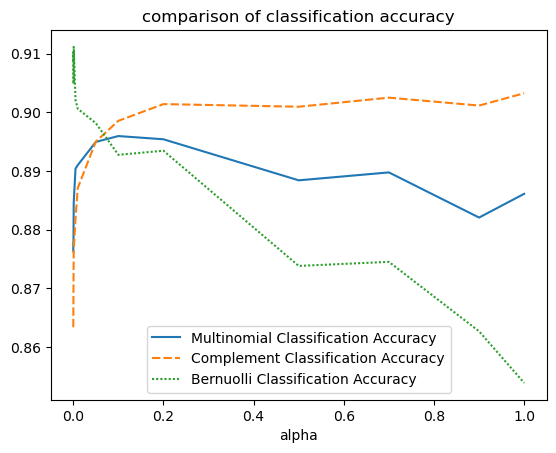

In [16]:
import seaborn as sns
df_plot = pd.DataFrame()
df_plot['alpha'] = search_list
df_plot['Multinomial Classification Accuracy'] = mean1
df_plot['Complement Classification Accuracy'] = mean2
df_plot['Bernuolli Classification Accuracy'] = mean3
df_plot = pd.DataFrame(df_plot).set_index('alpha')
sns.lineplot(data=df_plot)
plt.title("comparison of classification accuracy")
plt.show()

由此可以看到，Multinomial和Bernuolli的classification accuracy均是先升高再下降，而complement模型则是先快速升高后趋于稳定，且最后的准确率是complement模型最高，所以接下来用complement最好的模型参数来看看最后的结果。

### 首先绘制随着alpha的变化，交叉验证误差图，选取平均准确率最高且方差较小的alpha作为最后模型的参数

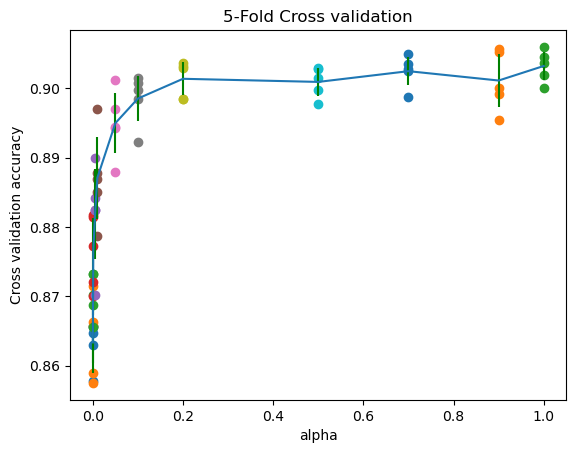

In [17]:
dict_=dict(zip(search_list,cv2))
accu_mean=[]
accu_std=[]
for i,j in dict_.items():
    accu_mean.append(np.mean(j))
    accu_std.append(np.std(j))
for i in search_list:
    accus = dict_[i]
    plt.scatter([i] * len(accus), accus)
plt.errorbar(search_list, accu_mean, accu_std,ecolor='green')
plt.title('5-Fold Cross validation')
plt.xlabel('alpha')
plt.ylabel('Cross validation accuracy')
plt.show()

In [18]:
alpha_best=search_list[np.argmax(mean2)]
alpha_best

1

### 最后达到的效果：

In [19]:
model = ComplementNB(alpha=alpha_best)
model.fit(Xtrain_, y_train)
y_pred=model.predict(Xtest_)
val_accuracy= model.score(Xtest_, y_test)
print(classification_report(y_test, y_pred, target_names=np.unique(df.target)))

                          precision    recall  f1-score   support

             alt.atheism       0.77      0.86      0.81       212
           comp.graphics       0.87      0.89      0.88       177
 comp.os.ms-windows.misc       0.93      0.91      0.92       203
comp.sys.ibm.pc.hardware       0.88      0.89      0.88       198
   comp.sys.mac.hardware       0.96      0.92      0.94       212
          comp.windows.x       0.93      0.88      0.91       188
            misc.forsale       0.94      0.91      0.93       221
               rec.autos       0.97      0.93      0.95       214
         rec.motorcycles       0.95      1.00      0.97       204
      rec.sport.baseball       0.97      0.95      0.96       211
        rec.sport.hockey       0.91      0.98      0.94       183
               sci.crypt       0.96      0.98      0.97       193
         sci.electronics       0.94      0.91      0.92       182
                 sci.med       0.97      0.94      0.95       205
         

最后达到90%的准确率，效果还不错。